In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [83]:
data, labels = make_blobs(n_samples=300,n_features=2,centers=4,random_state=5)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [84]:
def initialize_centroids(data,k):
    return data[np.random.choice(data.shape[0],k,replace=False)]

def compute_distances(data,centroids):
    return np.sqrt(((data[:,None]-centroids)**2).sum(-1))

def assign_clusters(distances):
    return np.argmin(distances,axis=1)

def update_centroids(data,clusters,k):
    return np.array([data[clusters==i].mean(axis=0) for i in range(k)])

def k_means(data,k,max_iterations=100):
    centroids = initialize_centroids(data,k)
    for i in range(max_iterations):
        distances = compute_distances(data,centroids)
        clusters = assign_clusters(distances)
        new_centroids = update_centroids(data,clusters,k)
        if np.allclose(centroids,new_centroids):
            break
        centroids = new_centroids
    return centroids,clusters


In [85]:
k=4
centroids,clusters = k_means(data_scaled,k)
wcss = np.sum([np.sum(np.square(data_scaled[clusters==i]-centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares:",wcss)

Total within-cluster sum of squares: 32.57584368548989


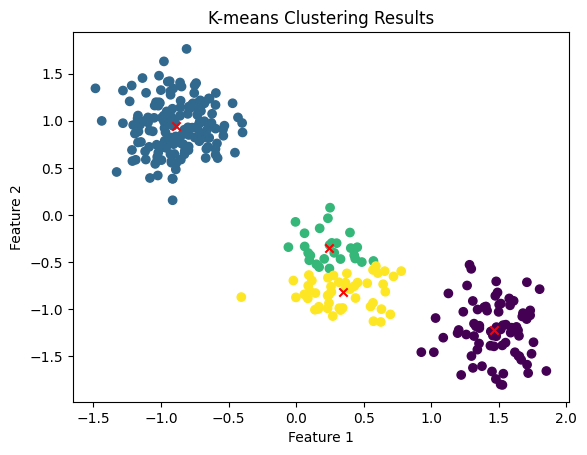

In [86]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()

In [87]:
def initialize_centroids(data, k):
    return data[np.random.choice(data.shape[0], k, replace=False)]

def compute_distances(data, centroids):
    return np.sum(np.abs(data[:, None] - centroids), axis=-1)

def assign_clusters(distances):
    return np.argmin(distances, axis=1)

def update_centroids(data, clusters, k):
    return np.array([np.median(data[clusters == i], axis=0) for i in range(k)])

def k_median(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for i in range(max_iterations):
        distances = compute_distances(data, centroids)
        clusters = assign_clusters(distances)
        new_centroids = update_centroids(data, clusters, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters


In [88]:
def initialize_medoids(data, k):
    return data[np.random.choice(data.shape[0], k, replace=False)]

def compute_dissimilarities(data, medoids):
    return np.sqrt(((data[:, None] - medoids) ** 2).sum(-1))

def assign_clusters(dissimilarities):
    return np.argmin(dissimilarities, axis=1)

def update_medoids(data, clusters, k):
    updated_medoids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        min_distance = float('inf')
        best_medoid = None
        for point in cluster_points:
            total_distance = np.sum(np.sqrt(np.sum((cluster_points - point) ** 2, axis=1)))
            if total_distance < min_distance:
                min_distance = total_distance
                best_medoid = point
        updated_medoids.append(best_medoid)
    return np.array(updated_medoids)

def k_medoids(data, k, max_iterations=100):
    medoids = initialize_medoids(data, k)
    for _ in range(max_iterations):
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters(dissimilarities)
        new_medoids = update_medoids(data, clusters, k)
        if np.array_equal(medoids, new_medoids):
            break
        medoids = new_medoids
    return medoids, clusters

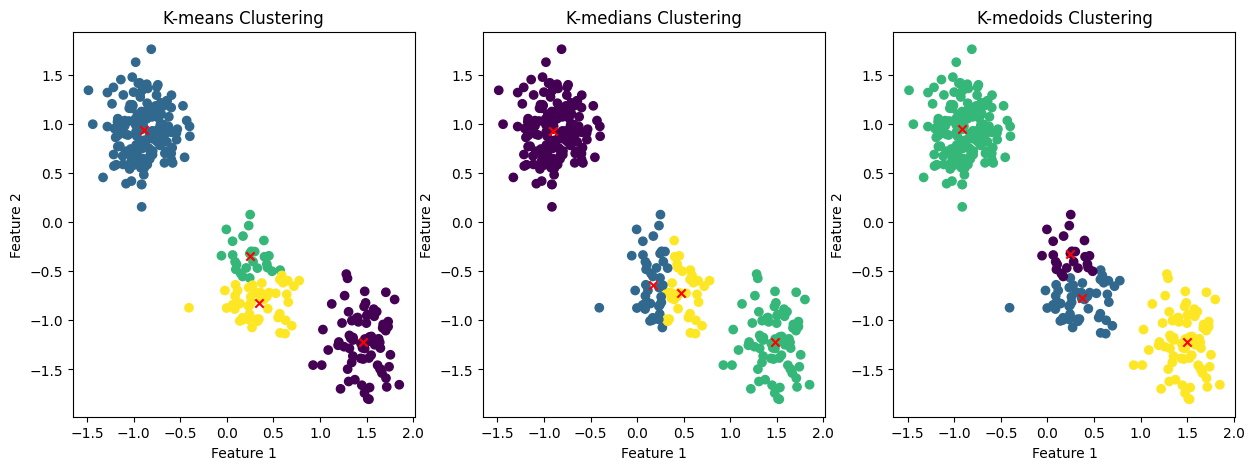

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# K-means
ax = axes[0]
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
ax.set_title('K-means Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# K-medians
centroids_medians, clusters_medians = k_median(data_scaled, k)
ax = axes[1]
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_medians, cmap='viridis')
ax.scatter(centroids_medians[:, 0], centroids_medians[:, 1], c='red', marker='x')
ax.set_title('K-medians Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# K-medoids
medoids, clusters_medoids = k_medoids(data_scaled, k)
ax = axes[2]
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_medoids, cmap='viridis')
ax.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='x')
ax.set_title('K-medoids Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

plt.show()